In [1]:
import torch

x = torch.ones(2, 2, requires_grad=True)
print(x)
y = x + 2
print(y)
z = y * y * 3
out = z.mean()
out.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [9]:
# -*- coding: utf-8 -*-
import torch

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the a scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()


0 27837480.0
1 25254832.0
2 26314180.0
3 27313620.0
4 25381572.0
5 19952948.0
6 13162245.0
7 7633493.0
8 4212695.0
9 2400927.0
10 1494110.125
11 1031749.4375
12 778080.75
13 623508.75
14 518768.53125
15 441439.8125
16 380815.78125
17 331489.90625
18 290372.09375
19 255638.890625
20 226114.125
21 200759.46875
22 178818.78125
23 159800.46875
24 143212.3125
25 128686.140625
26 115918.109375
27 104659.140625
28 94708.5078125
29 85898.0546875
30 78061.09375
31 71079.1484375
32 64838.859375
33 59246.08203125
34 54222.5390625
35 49700.73828125
36 45621.3828125
37 41935.10546875
38 38597.46875
39 35571.47265625
40 32821.65625
41 30319.609375
42 28039.46484375
43 25958.76171875
44 24057.31640625
45 22316.9140625
46 20722.271484375
47 19258.681640625
48 17914.53125
49 16677.546875
50 15538.626953125
51 14488.66796875
52 13520.130859375
53 12624.90234375
54 11797.259765625
55 11030.875
56 10320.896484375
57 9662.544921875
58 9051.9716796875
59 8484.9970703125
60 7958.0263671875
61 7467.5190429687

441 0.001026207348331809
442 0.0009982767514884472
443 0.0009712513419799507
444 0.0009454565588384867
445 0.0009193280711770058
446 0.0008941139094531536
447 0.0008690176764503121
448 0.0008447642321698368
449 0.0008226071367971599
450 0.0008006204734556377
451 0.0007803522166796029
452 0.0007596786599606276
453 0.0007403125055134296
454 0.000720523705240339
455 0.0007014659349806607
456 0.0006846809410490096
457 0.000666445994284004
458 0.0006497877766378224
459 0.0006331478944048285
460 0.000618316582404077
461 0.000602094572968781
462 0.00058671401347965
463 0.0005720214685425162
464 0.00055790098849684
465 0.0005452103214338422
466 0.0005318432813510299
467 0.0005183257162570953
468 0.0005062907002866268
469 0.0004940853104926646
470 0.00048301785136573017
471 0.00047187056043185294
472 0.0004607629089150578
473 0.0004493992018979043
474 0.0004401388578116894
475 0.00042996712727472186
476 0.0004201772389933467
477 0.0004104323161300272
478 0.0004019253246951848
479 0.000392489077

In [10]:
# -*- coding: utf-8 -*-
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 647.4382934570312
1 600.087158203125
2 559.1369018554688
3 523.3048706054688
4 491.38543701171875
5 462.6326904296875
6 436.7915954589844
7 412.8688049316406
8 390.6138000488281
9 369.7791748046875
10 350.4232177734375
11 332.2376403808594
12 315.030029296875
13 298.8269958496094
14 283.39678955078125
15 268.62750244140625
16 254.55262756347656
17 241.0894775390625
18 228.19163513183594
19 215.86724853515625
20 204.15647888183594
21 192.9982452392578
22 182.3338623046875
23 172.0997314453125
24 162.33778381347656
25 153.04444885253906
26 144.18792724609375
27 135.77603149414062
28 127.79715728759766
29 120.20848846435547
30 113.01699829101562
31 106.19905090332031
32 99.7492904663086
33 93.66423034667969
34 87.92057037353516
35 82.48326110839844
36 77.35348510742188
37 72.52841186523438
38 67.99259185791016
39 63.725608825683594
40 59.71083068847656
41 55.94647216796875
42 52.4238395690918
43 49.12247085571289
44 46.03453063964844
45 43.14530563354492
46 40.44254684448242
47 37.91310

440 0.0002897505182772875
441 0.000284675566945225
442 0.00027969543589279056
443 0.0002748037804849446
444 0.0002700034820009023
445 0.00026528595481067896
446 0.0002606570196803659
447 0.0002561100700404495
448 0.0002516453678254038
449 0.0002472636988386512
450 0.0002429581363685429
451 0.00023873501049820334
452 0.00023458605573978275
453 0.0002305114467162639
454 0.0002265045914100483
455 0.000222574730287306
456 0.00021871317585464567
457 0.00021492387168109417
458 0.0002112004440277815
459 0.0002075426746159792
460 0.00020395124738570303
461 0.00020042344112880528
462 0.00019695931405294687
463 0.0001935586624313146
464 0.00019021652406081557
465 0.0001869318075478077
466 0.00018370836914982647
467 0.0001805452338885516
468 0.0001774332922650501
469 0.00017438600480090827
470 0.00017138404655270278
471 0.00016843447519931942
472 0.00016553675231989473
473 0.00016269527259282768
474 0.00015989858366083354
475 0.00015715276822447777
476 0.0001544562546769157
477 0.0001518100471002

In [23]:
# -*- coding: utf-8 -*-
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    #print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
print(x.shape)

torch.Size([64, 1000])


0.0015719758150219356


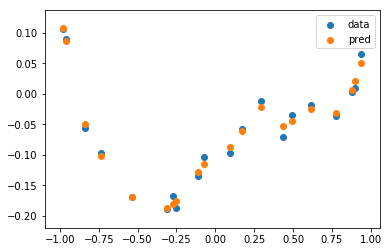

In [49]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('fitting.txt')
torch.set_default_tensor_type(torch.DoubleTensor)
x1 , y1 = data[:,0],data[:,1]
x,y = torch.from_numpy(np.asmatrix(x1).T),torch.from_numpy(np.asmatrix(y1).T)
plt.scatter(x1,y1, label = 'data')
#x, y = x1.double(), y1.double()


N, D_in, H, D_out = len(x), 1, 350, 1

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 5e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(5000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    #print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
print(loss.item())
plt.scatter(x,y_pred.data, label = 'pred')
plt.legend()